In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np
import seaborn as sns
#from sklearn.svm import SVC
#from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('android.csv')

In [3]:
data

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [4]:
data.shape

(70, 17)

In [5]:
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
data.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,stickynotes,0.043,2.0,0.100,12.0,1.335,57.79,42.12,1.05,0.55,317460.0,3.86,88320,36.630,14588.0,2151632,0
1,vimtiny,0.001,4.0,0.698,20.0,0.538,164.53,149.01,2.98,0.55,184041.0,7.78,94545,107.235,14219.0,2269099,0
2,sublime,0.157,4.0,0.237,41.0,0.922,29.45,31.54,0.42,0.75,81212.0,13.95,72923,85.676,17267.0,2313615,0
3,head,0.093,5.0,0.190,13.0,0.803,157.03,109.53,2.72,0.58,348305.0,2.16,94846,58.688,12534.0,2276301,0
4,spotify,0.370,5.0,0.467,15.0,1.354,63.32,51.43,0.74,0.86,198348.0,3.05,78884,41.534,19218.0,1925909,0


In [7]:
import seaborn as sns

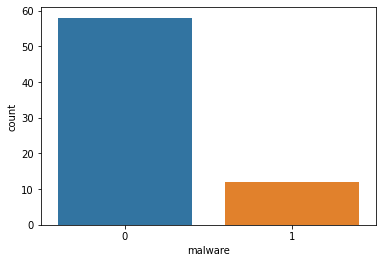

In [8]:
sns.countplot(x='malware',data=data)

In [9]:
target_count = data.malware.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 58
Class 1: 12


In [10]:
count_class_0, count_class_1 = data.malware.value_counts()

In [11]:
df_class_0 = data[data['malware'] == 0]
df_class_1 = data[data['malware'] == 1]

In [12]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


In [13]:
df_test_over.shape

(116, 17)

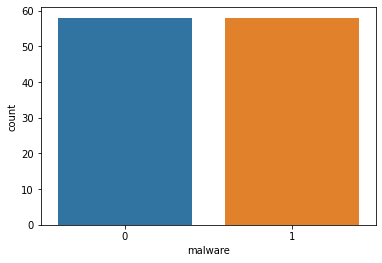

In [14]:
sns.countplot(x='malware',data=df_test_over)

In [15]:
X=df_test_over.iloc[:,df_test_over.columns !='malware']
Y=df_test_over.iloc[:,df_test_over.columns =="malware"]

In [16]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
0,stickynotes,0.043,2.0,0.100,12.0,1.335,57.79,42.12,1.05,0.55,317460.0,3.86,88320,36.630,14588.0,2151632
1,vimtiny,0.001,4.0,0.698,20.0,0.538,164.53,149.01,2.98,0.55,184041.0,7.78,94545,107.235,14219.0,2269099
2,sublime,0.157,4.0,0.237,41.0,0.922,29.45,31.54,0.42,0.75,81212.0,13.95,72923,85.676,17267.0,2313615
3,head,0.093,5.0,0.190,13.0,0.803,157.03,109.53,2.72,0.58,348305.0,2.16,94846,58.688,12534.0,2276301
4,spotify,0.370,5.0,0.467,15.0,1.354,63.32,51.43,0.74,0.86,198348.0,3.05,78884,41.534,19218.0,1925909


In [17]:
Y.head()

,malware
0,0
1,0
2,0
3,0
4,0


In [18]:
from sklearn.utils import shuffle

In [19]:
X, Y=shuffle(X, Y)

In [20]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
23,cp,0.106,2.000,0.150,0.158,0.915,58.20,39.07,0.85,0.69,140291.0,1.34,92480,48.854,24849.0,2219658
58,hp-doctor,0.406,0.299,0.038,10.000,1.499,50.63,34.44,1.31,0.39,394468.0,1.44,84585,19.101,10572.0,2075422
36,41089,0.337,1.000,0.000,49.000,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597
17,perf,0.190,4.000,0.137,14.000,0.693,74.91,65.85,1.49,0.50,241903.0,2.89,65722,54.560,13870.0,1699014
62,40029,0.655,2.000,0.682,35.000,0.312,437.40,360.90,3.01,1.45,92388.0,12.67,93516,109.877,15086.0,2244389


In [21]:
X=X.drop(columns='name')
X.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
23,0.106,2.000,0.150,0.158,0.915,58.20,39.07,0.85,0.69,140291.0,1.34,92480,48.854,24849.0,2219658
58,0.406,0.299,0.038,10.000,1.499,50.63,34.44,1.31,0.39,394468.0,1.44,84585,19.101,10572.0,2075422
36,0.337,1.000,0.000,49.000,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597
17,0.190,4.000,0.137,14.000,0.693,74.91,65.85,1.49,0.50,241903.0,2.89,65722,54.560,13870.0,1699014
62,0.655,2.000,0.682,35.000,0.312,437.40,360.90,3.01,1.45,92388.0,12.67,93516,109.877,15086.0,2244389


In [22]:
Y.head()

,malware
23,0
58,0
36,1
17,0
62,1


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [25]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

,Specs,Score
14,ref-cycles,889931.794022
9,branches,686497.244118
6,stalled-cycles-backend-percent,118370.957602
11,bus-cycle,85306.591072
5,stalled-cycles-frontend-percent,33722.470545
13,cache-references,3795.712325
7,Instructions-per-cycle,2695.790251
12,cache-misses-percent,408.950118
3,page-faults,235.189495
10,branch-misses-percent,109.232116


[0.05684812 0.04235808 0.03519505 0.05840146 0.05390252 0.03761713
 0.02270346 0.03389557 0.12396863 0.08790446 0.16043116 0.08316278
 0.08834219 0.04031415 0.07495524]


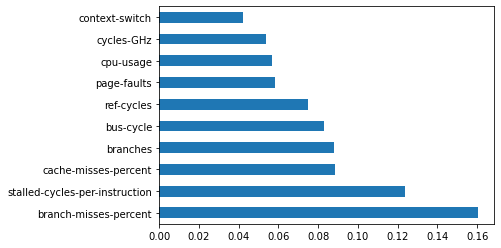

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [28]:
X_train.shape

(92, 15)

In [29]:
X_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
10,0.150,0.523,0.000,50.0,0.035,3599.01,2861.55,37.76,0.95,134083.0,11.20,94940,82.799,15177.0,2278579
15,0.488,0.795,0.000,37.0,0.738,216.57,188.24,1.18,1.83,86205.0,12.66,93244,107.295,12601.0,2237832
16,0.556,0.000,0.000,65.0,1.066,133.91,106.30,1.32,1.02,139637.0,12.68,96941,82.830,16397.0,2326595
62,0.655,2.000,0.682,35.0,0.312,437.40,360.90,3.01,1.45,92388.0,12.67,93516,109.877,15086.0,2244389
41,0.882,4.000,0.300,33.0,0.012,11.07,12.87,0.59,0.22,48230.0,1.19,25984,40.036,5538.0,844395


In [30]:
y_train.head()

,malware
10,0
15,1
16,1
62,1
41,0


In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# DecisionTreeClassifier 

In [32]:
from sklearn.tree import DecisionTreeClassifier 

In [33]:
tree = DecisionTreeClassifier() 

In [34]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [36]:
model2=metrics.accuracy_score(y_test,y_pred)
print(model2)

0.9583333333333334


In [37]:
cnf_matrix = confusion_matrix(y_test,y_pred)

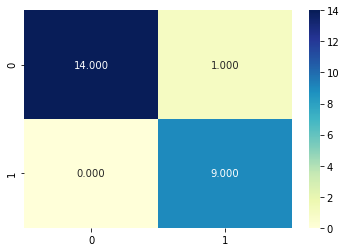

In [38]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()